Section 4 Figures:
- Eq 4.1: MoI Approximation (so that he doesn't have to use the full MoI in his calculations?)
    It's probably sufficient to merely compare it to the usual MoI
- Eq 4.7: Expected size of update to second wave. 
    You don't have this data recorded for the homogeneous case. You need to run chef with social > 0 to get this.
    variable: avgSecUpFDA
    Update: I'm running these now. First for 0.1, then possibly for others. Might take awhile. Did run. Need to check it.
    
    Hey, btw, if you want the homogeneous case at theta = 1, you can pull that from the uniform case just fine; they're equivalent.

In [1]:
import os
print(os.getcwd())
import numpy as np
import scipy.special as sp
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.integrate import quad

C:\Users\Megan\Documents\Python Scripts\NMW Section 4


In [2]:
pi = np.pi


        
def MoI(x,time,D = 1, mu = 1):
    z = 1.0
    nom = 4*D*time
    mut = mu*time
    zed = mu*z/D
    j = (1/np.sqrt(pi*nom))*np.exp(-(x-mut)**2/nom) - np.exp(-(x-2*z-mut)**2/nom+zed) - np.exp(-(x+2*z-mut)**2/nom-zed)
    return j

def RpMoI(time,D = 1, mu = 1):
    z = 1.0
    rplus = quad(MoI,0,z,args = (time))
    rminus = quad(MoI,-z,0,args = (time))
    rp = np.log(rplus[0]/rminus[0])
    return rp

def pos(n, th = 0.1):
    a = (n-1)/2*(1 + (th/np.sqrt(4*pi*np.log(n))))
    return a

def neg(n, th = 0.1):
    a = (n-1)/2*(1 - (th/np.sqrt(4*pi*np.log(n))))
    return a

def nmw41(t,th = 1):
    rp = 2*np.sqrt(t/pi)*(np.exp(-th**2/(4*t))+1)
    return rp

def nmw47(n, th = 0.1):
    c = ((th**2)*n)/(2*pi*np.log(n))
    return c

sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)

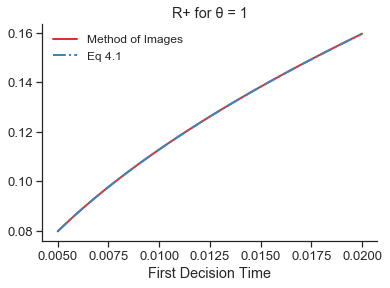

In [48]:
# Compare MoI RP and RP approximation (nmw 4.1)

times = np.linspace(0.005,0.02)

MoI = [RpMoI(t) for t in times]
approx = [nmw41(t) for t in times]

plt.plot(times,MoI, color=red_colors[4], lw=2, alpha=1, label = 'Method of Images') 
plt.plot(times, approx, linestyle = 'dashdot',color=blue_colors[4], lw=1, alpha=1, label = 'Eq 4.1') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('First Decision Time')
str2 = 'R+ for ' + chr(952) + ' = 1'
plt.title(str2)

sns.despine()

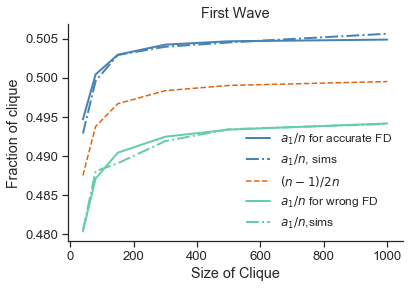

In [15]:
# Compare the quantity a1-(u1-1) for FDA, FDW with the line (n-1)/2

n_values = (40,80,150,300,500,1000)
eqFDA = [pos(n)/n for n in n_values]
eqFDW = [neg(n)/n for n in n_values]
halfsies = [(n-1)/(n*2) for n in n_values]

str1 = 'SelfHomo_0_1_Cooked_n'

diffFDA = []
diffFDW = []
FDAciLow = []
FDAciHigh = []
FDWciLow = []
FDWciHigh = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    waves = current['wavesDec']
    #print(waves)
    FDA = waves.item(0,0,0)
    FDW = waves.item(0,1,0)
    diffFDA.append(FDA/n)
    diffFDW.append(FDW/n)
    FDAciLow.append(waves.item(0,0,1))
    FDAciHigh.append(waves.item(0,0,2))
    FDWciLow.append(waves.item(0,1,1))
    FDWciHigh.append(waves.item(0,1,2))
    
plt.plot(n_values,eqFDA, color = 'steelblue', lw = 2, alpha = 1, label = '$a_1/n$ for accurate FD')
plt.plot(n_values, diffFDA, linestyle = 'dashdot', color = 'steelblue', lw = 2, alpha = 1, label = '$a_1/n$, sims')
plt.plot(n_values, FDAciLow, color = 'steelblue',  alpha = .3)
plt.plot(n_values, FDAciHigh, color = 'steelblue',  alpha = .3)
plt.plot(n_values, halfsies, '--',color = orange_colors[4],label = '$(n-1)/2n$')
plt.plot(n_values,eqFDW, color = 'mediumaquamarine', lw = 2, alpha = 1, label = '$a_1/n$ for wrong FD')
plt.plot(n_values,diffFDW,linestyle = 'dashdot', color = 'mediumaquamarine', lw = 2, alpha = 1, label = '$a_1/n$,sims')
plt.plot(n_values, FDWciHigh, color = 'mediumaquamarine',  alpha = .3)
plt.plot(n_values, FDWciLow, color = 'mediumaquamarine',  alpha = .3)


plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.ylabel('Fraction of clique')
plt.title('First Wave')

sns.despine()

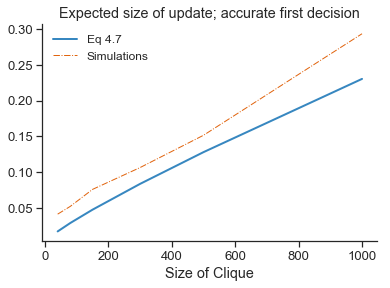

In [52]:
str1 = 'SelfHomo_0_1_Cooked_n'

n_values = (40,80,150,300,500,1000)

f1 = [nmw47(n, th = 0.1) for n in n_values]

f1File = []
f1CIlow = []
f1CIhigh = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    avgUp = current['avgSecUpFDA']
    ci = current['avgSecUpFDACI']
    #print(waves)
    #avgf1 = waves.item(1,0)
    f1File.append(avgUp[0])
    f1CIlow.append(ci[0])
    f1CIhigh.append(ci[1])
    
#print(f1File)
plt.plot(n_values,f1,  color=blue_colors[4], lw=2, alpha=1, label = 'Eq 4.7') 
plt.plot(n_values,f1File, linestyle = 'dashdot',color=orange_colors[4], lw=1, alpha=1,label = 'Simulations') 
plt.plot(n_values,f1CIlow,color=orange_colors[4],alpha=.3)
plt.plot(n_values,f1CIhigh,color=orange_colors[4],alpha=.3)

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected size of update; accurate first decision')

sns.despine()